In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2, thinkplot
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score

### Data cleaning

In [32]:
x = pd.read_csv('../Data/train_values.csv')
y = pd.read_csv('../Data/train_labels.csv')
x = x.drop('patient_id', axis=1)
y = y['heart_disease_present']
categorical_vars= ['thal', 'chest_pain_type'] # list of categorical variables

Standardize the data by subtracting mean and dividing standard deviation.

In [33]:
for col in x.columns:
    if col not in categorical_vars:
        mean = x[col].mean()
        std = x[col].std()
        x[col] = (x[col] - mean)/std

One hot encoding the categorical data and drop the first column to prevent linear dependence/collinearity.

In [34]:
x = pd.get_dummies(x, columns=categorical_vars, drop_first=True)
x.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4
0,-0.888762,-0.194652,-0.716404,-0.437019,0.951196,1.115158,-0.900694,0.670152,-1.051032,0.929891,-0.678852,1,0,1,0,0
1,0.727169,-1.252825,-0.716404,-0.437019,-1.051322,-0.667915,0.526148,-1.483908,-0.086892,0.386007,-0.678852,1,0,0,1,0
2,-0.888762,-0.371014,2.378462,-0.437019,0.951196,1.039283,-0.900694,0.670152,2.377024,0.567302,1.464891,1,0,0,0,1
3,-0.888762,1.216246,-0.716404,-0.437019,-1.051322,-0.497195,-0.900694,0.670152,-1.586666,1.428452,-0.678852,0,1,0,0,1
4,2.343100,2.744719,-0.716404,-0.437019,0.951196,0.394342,2.844768,0.670152,0.448742,-0.203201,-0.678852,0,1,0,0,0


### Comparing different models

First, we define our helper function that run 1000 simulations:
- Shuffles the data
- Splits the data into training and test sets (80:20)
- Trains the model and computes accuracy on the test set
- Adds the accuracy to the list

In [161]:
def GetAccuracyDist(model=None, inter=1000):
    if model is None:
        raise TypeError
        
    accs = []
    for _ in range(inter):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
        model.fit(x_train, y_train)
        y_test_pred = model.predict(x_test)
        acc = accuracy_score(y_test_pred, y_test)
        accs.append(acc)
        
    return np.asarray(accs)

#### Logistic Regression

In [175]:
accs = GetAccuracyDist(LogisticRegression())
accs.mean()

0.8205

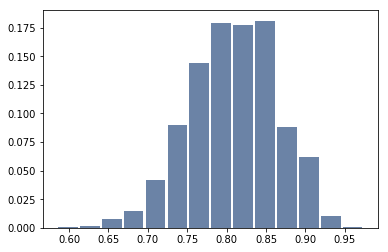

In [176]:
pmf = thinkstats2.Pmf(accs)
thinkplot.Hist(pmf, align='right')

#### KNN

In [162]:
accs = GetAccuracyDist(KNeighborsClassifier(n_neighbors=3))
accs.mean()

0.8058611111111111

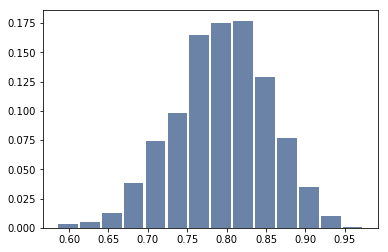

In [170]:
pmf = thinkstats2.Pmf(accs)
thinkplot.Hist(pmf, align='right')

We can also use box plot for these accuracy distribution?